In [18]:
import pandas as pd
import numpy as np
from numpy.random import randn
from pandas import Series
from pandas import DataFrame
from io import StringIO
from scipy import stats
from datetime import datetime
from pandas_datareader import DataReader
#PLOTTING 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.apionly as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
tech_list=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,241.596640,236.372016,238.659723,239.192885,3.246966e+07,238.023312
std,43.542478,42.271514,42.772955,43.109034,1.730144e+07,43.675394
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,205.000000,201.710007,203.169998,203.229996,2.121840e+07,201.446182
50%,227.490005,222.860001,225.070007,224.369995,2.704360e+07,223.198593
75%,271.000000,265.390015,267.480011,268.480011,3.602860e+07,267.844330
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-04 to 2020-04-03
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


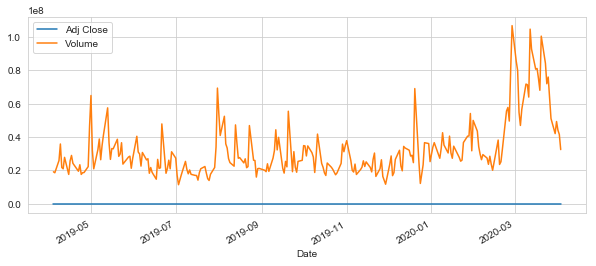

In [3]:
AAPL.info()
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))
AAPL['Volume'].plot(legend=True,figsize=(10,4))

ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

-0.12864695596573805


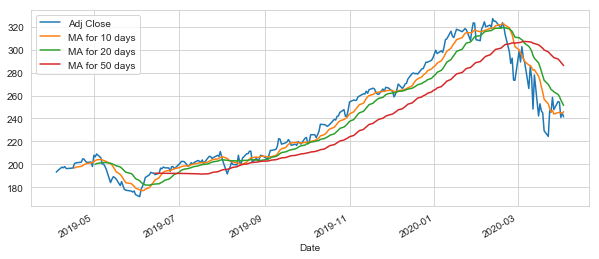

In [4]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
#AAPL['Daily Return'].plot(legend=True, figsize=(10,4), marker=' o', linestyle='--')#Daily return
#sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

print(AAPL['Daily Return'].min())

Symbols           AAPL         AMZN         GOOG        MSFT
Date                                                        
2019-04-04  193.161682  1818.859985  1215.000000  117.801422
2019-04-05  194.454758  1837.280029  1207.150024  118.324493
2019-04-08  197.514709  1849.859985  1203.839966  118.363968
2019-04-09  196.922470  1835.839966  1197.250000  117.722450
2019-04-10  198.027985  1847.329956  1202.160034  118.620583
Symbols         AAPL      AMZN      GOOG      MSFT
Date                                              
2019-04-04       NaN       NaN       NaN       NaN
2019-04-05  0.006694  0.010127 -0.006461  0.004440
2019-04-08  0.015736  0.006847 -0.002742  0.000334
2019-04-09 -0.002998 -0.007579 -0.005474 -0.005420
2019-04-10  0.005614  0.006259  0.004101  0.007629


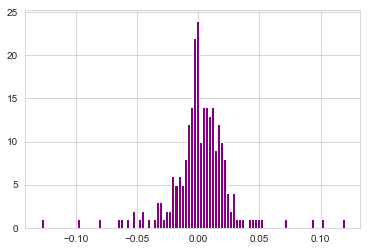

In [5]:
#OR
AAPL['Daily Return'].hist(bins=100,color='purple')
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']
print(closing_df.head())
tech_rets=closing_df.pct_change()
print(tech_rets.head())

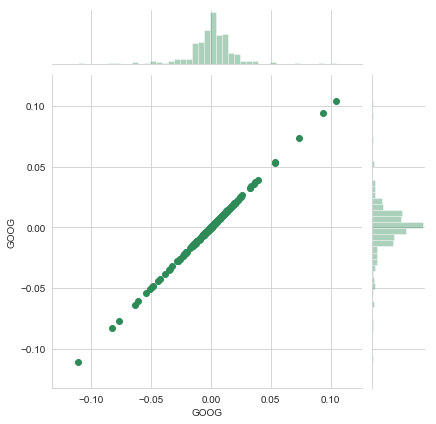

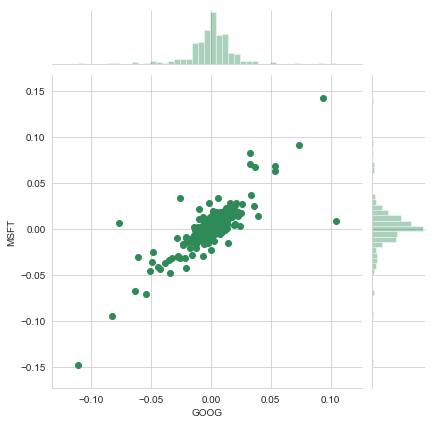

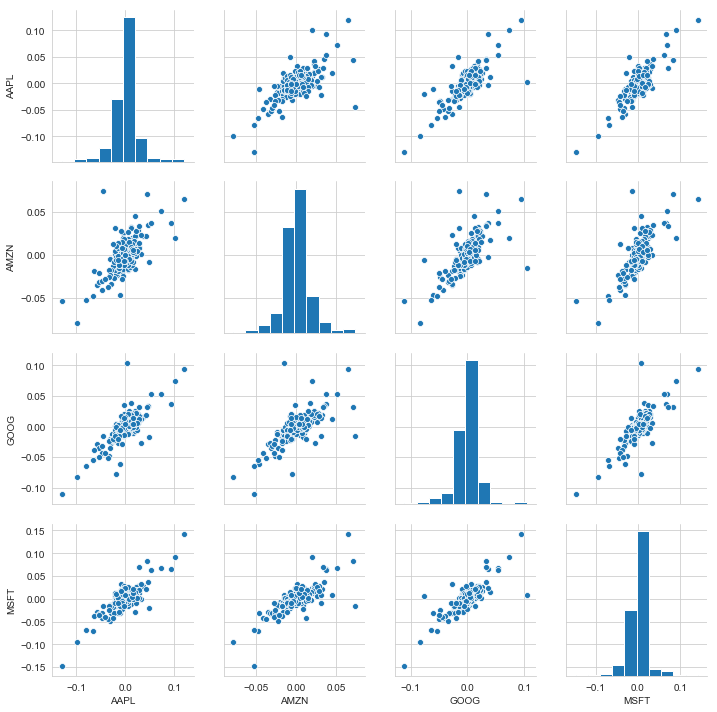

In [6]:
# Comapre to itself
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')
sns.pairplot(tech_rets.dropna())

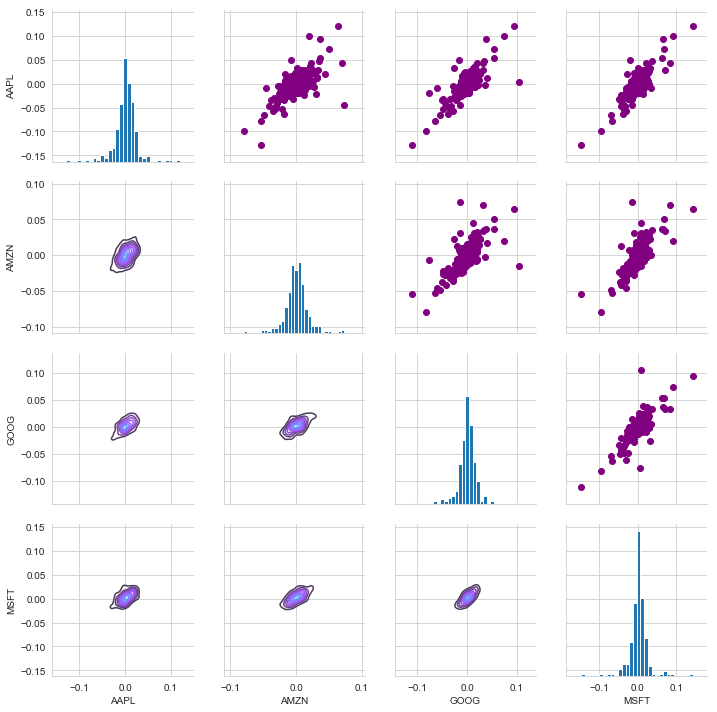

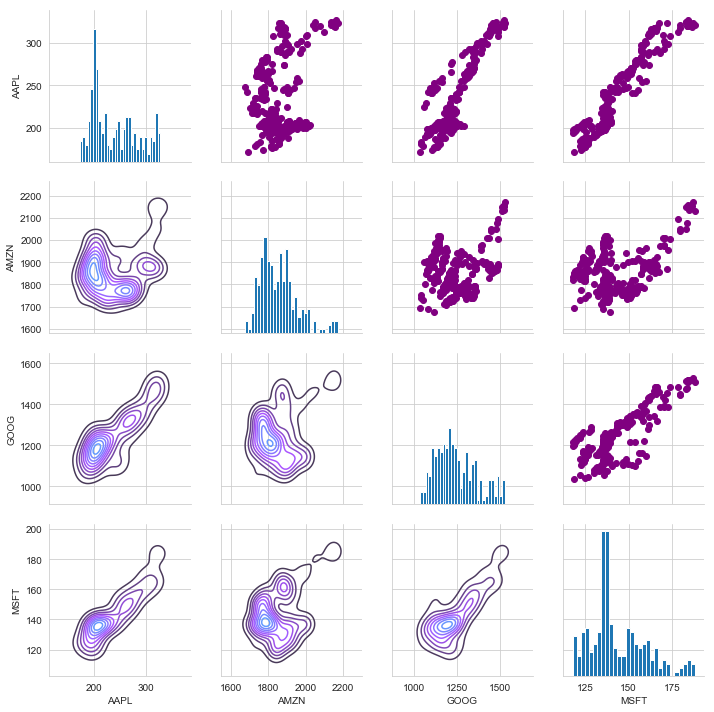

In [7]:
# contol the figure
returns_fig=sns.PairGrid(tech_rets.dropna(),)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

returns_fig=sns.PairGrid(closing_df.dropna(),)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
#WE CAN SEE GOOD CORRELATION BETWEEN BETWEEN MSFT & AMZN stocks

Symbols      AAPL      AMZN      GOOG      MSFT
Symbols                                        
AAPL     1.000000  0.271002  0.888743  0.938625
AMZN     0.271002  1.000000  0.290162  0.443957
GOOG     0.888743  0.290162  1.000000  0.817743
MSFT     0.938625  0.443957  0.817743  1.000000


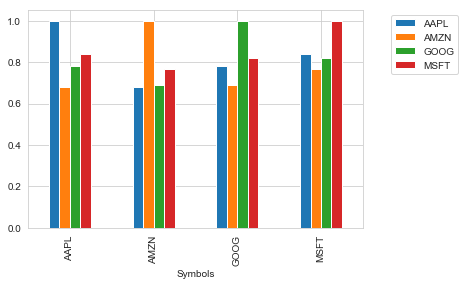

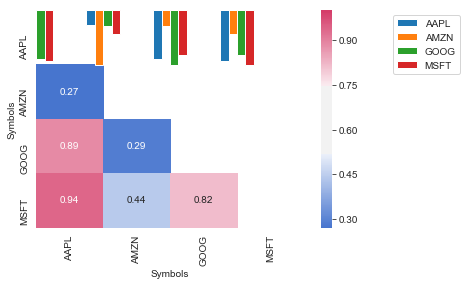

In [8]:
#PLOT THE CORRELATION TO SEE IF WE GUESSED CORRECTLY
corr1=tech_rets.dropna().corr()
corr2=closing_df.dropna().corr()
print(corr2)
corr1.dropna().plot(kind='bar',subplots=False)#GOOG and MSFT have highest CORRELATION
plt.legend(bbox_to_anchor=(1.3,1), loc="upper right")
corr2.dropna().plot(kind='bar',subplots=False)#MSFT and AMZN have highest CLOSING CORRELATION
plt.legend(bbox_to_anchor=(1.6,1), loc="upper right")
mask=np.zeros_like(corr2)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr2,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

-0.034258428085985886
-0.050447857538687746
-0.06908890611453253
-0.07025586063082358


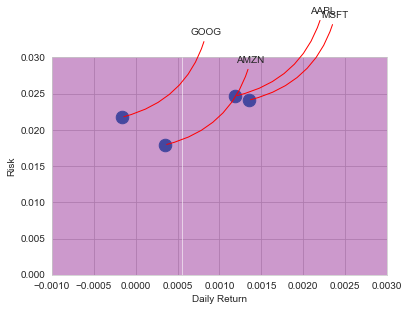

In [9]:
rets=tech_rets.dropna()
area=np.pi*50
plt.scatter(rets.mean(),rets.std(),s=area)
plt.ylim([0.015,0.030])
plt.xlim([-0.001,0.003])
plt.xlabel('Expexted return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
            label,
            xy=(x,y), xytext=(100,80),
            textcoords='offset points', ha='right', va='bottom',
            arrowprops=dict(arrowstyle='-',color='red',connectionstyle='arc3,rad=-0.3'))

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
print(tech_rets['AAPL'].quantile(0.05))
print(tech_rets['AMZN'].quantile(0.01))
print(tech_rets['MSFT'].quantile(0.01))
print(tech_rets['GOOG'].quantile(0.01))
# WITH 95 PC CONFIDENCE THE LOSS WONT BE MORE THAN rets*100 at 95% of days 

In [10]:
#MONTE CARLO METHOD{run various simulations, then find how risky a stock is}
days=365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

def stock_monte_carlo (start_price,days,mu,sigma):
    #define price array
    price=np.zeros(days)
    price[0]=start_price
    #Shock and Drift
    shock=np.zeros(days)
    drift=np.zeros(days)
    # Run price array for number of days
    for x in range(1,days):
        # Calculate Schock, random normal to choose E0 value
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift, s(mu)(delta t)
        drift[x] = mu * dt
        # Calculate Price, S(sigma)(E0)(sqrt(delta t))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

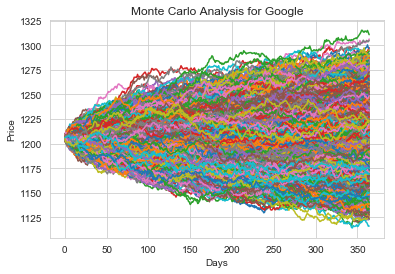

In [11]:
start_price=GOOG['Open'][0]

for run in range(10000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')
runs=10000
simulations=np.zeros(runs)

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05,
and the average final price over 10,000 runs was USD623.36.
The red line indicates the value of stock at risk at the desired confidence interval.
For every stock, we'd be risking USD 18.38, 99% of the time.


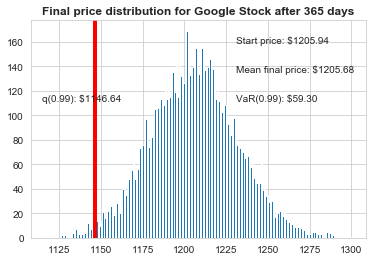

In [17]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

print("We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05,") 
print("and the average final price over 10,000 runs was USD623.36.")
print("The red line indicates the value of stock at risk at the desired confidence interval.")
print("For every stock, we'd be risking USD 18.38, 99% of the time.")